In [1]:
from obelix_ml_pipeline.predictions_on_unseen_substrate import predict_out_of_sample_substrate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt

# Objective 1: Predictions on unseen substrate

For a complete new substrate, the model gives the performance of 192 ligands with an accuracy as high as possible
1A Methodology:
Classification on activity, regression on ee

*   Use more accurate representation of substrate!!
*   Train on SM1, SM2 (SM7, SM8), predict SM3
*   Train on SM2, SM3 (SM7, SM8), predict SM1
*   Train on SM1, SM3 (SM7, SM8), predict SM2

## Example application of pipeline

Training and testing classifier
Test size in training (based on K-fold): 0.2
Mean test performance: 0.83 +/- 0.05
Best model performance: 0.98
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Test set performance balanced_accuracy:  0.8333750469277938
Test set confusion matrix:  [[ 43  18]
 [  5 126]]


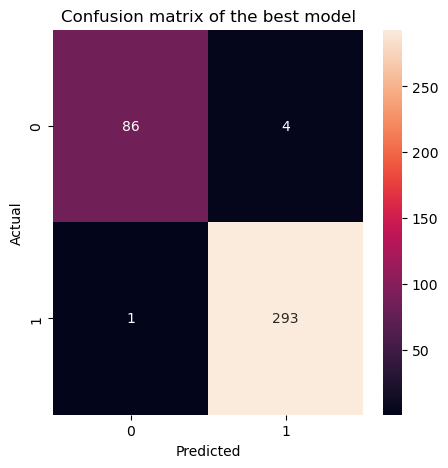

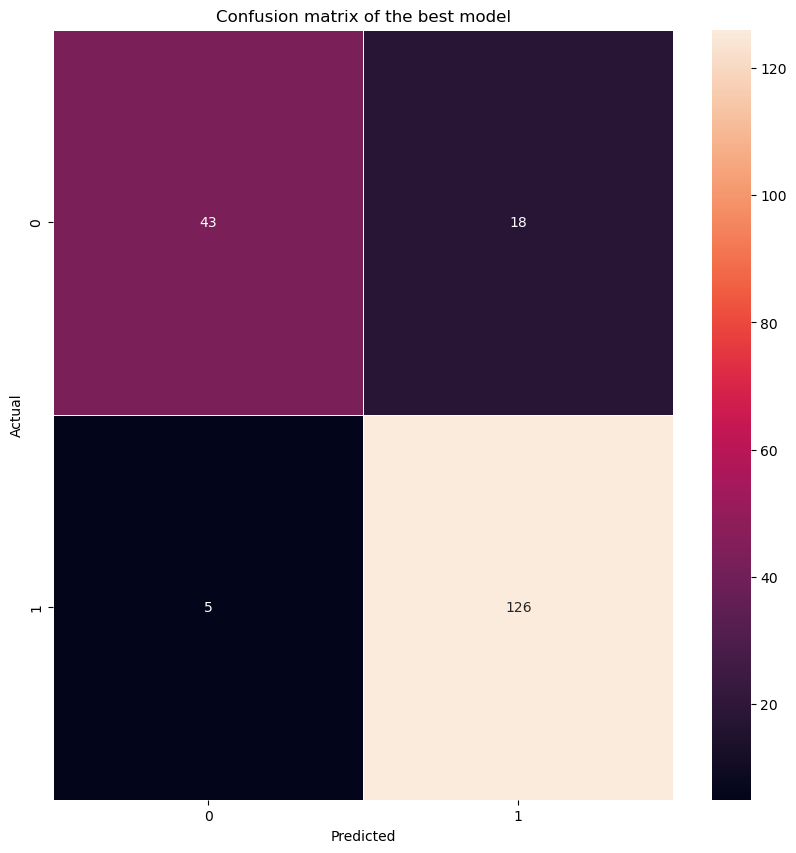

In [6]:
# try classifier with loaded representations
selected_ligand_representations = ['dft_nbd_model']
selected_substrate_representations = ['ecfp']
target = 'Conversion'
target_threshold = 0.8
rf_model = RandomForestClassifier(random_state=42)
scoring = 'balanced_accuracy'
train_splits = 5
n_jobs = 4
binary = True
plot_dendrograms = False
substrate_names_column = 'Substrate'
ligand_numbers_column = 'Ligand#'
list_of_training_substrates = ['SM1', 'SM2']
list_of_test_substrates = ['SM3']
print_ml_results = True
print('Training and testing classifier')
print(f'Test size in training (based on K-fold): {1/train_splits}')
# do the same with general function predict_out_of_sample_substrate
best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test = predict_out_of_sample_substrate(selected_ligand_representations, selected_substrate_representations, ligand_numbers_column, substrate_names_column, target, target_threshold, train_splits, binary=binary, list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates, rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs, plot_dendrograms=plot_dendrograms)


In [7]:
fig_fi

Training and testing regression
Test size: 0.2
Mean test performance: 0.45 +/- 0.06
Best model performance: 0.95
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test set performance r2:  0.5544707208667725


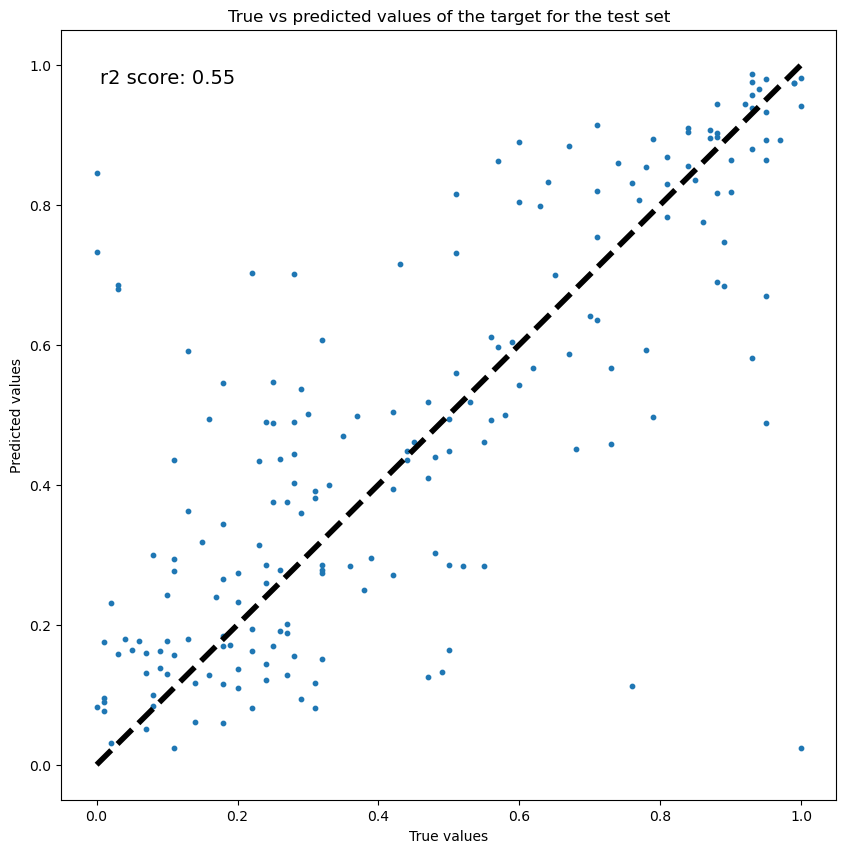

In [8]:
# try regression with loaded representations
target = 'EE'
target_threshold = 0.6
rf_model = RandomForestRegressor(random_state=42)
scoring = 'r2'
binary = False
print('Training and testing regression')
print(f'Test size: {1/train_splits}')
best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test = predict_out_of_sample_substrate(
    selected_ligand_representations, selected_substrate_representations, ligand_numbers_column,
    substrate_names_column, target, target_threshold, train_splits, binary=binary,
    list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates,
    rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs, plot_dendrograms=plot_dendrograms)

In [9]:
fig_fi

## Test effect of different substrate representations

### Test effect of different substrate representations on classification

Training and testing classifier
Test size in training (based on K-fold): 0.2
Testing substrate representation: dft_steric_fingerprint
Mean test performance during training: 0.83 +/- 0.03
Balanced accuracy on test substrate: 0.842134901764485
----------------------------------------
Testing substrate representation: smiles_steric_fingerprint
Mean test performance during training: 0.84 +/- 0.01
Balanced accuracy on test substrate: 0.8459516956576149
----------------------------------------
Testing substrate representation: dl_chylon
Mean test performance during training: 0.79 +/- 0.08
Balanced accuracy on test substrate: 0.8333750469277938
----------------------------------------
Testing substrate representation: ecfp
Mean test performance during training: 0.83 +/- 0.05
Balanced accuracy on test substrate: 0.8333750469277938
----------------------------------------
Testing substrate representation: rdkit
Mean test performance during training: 0.82 +/- 0.07
Balanced accuracy on test subst

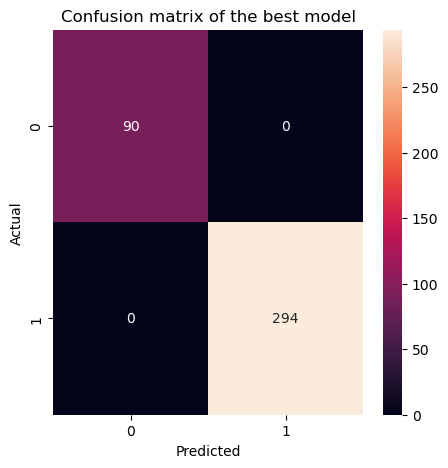

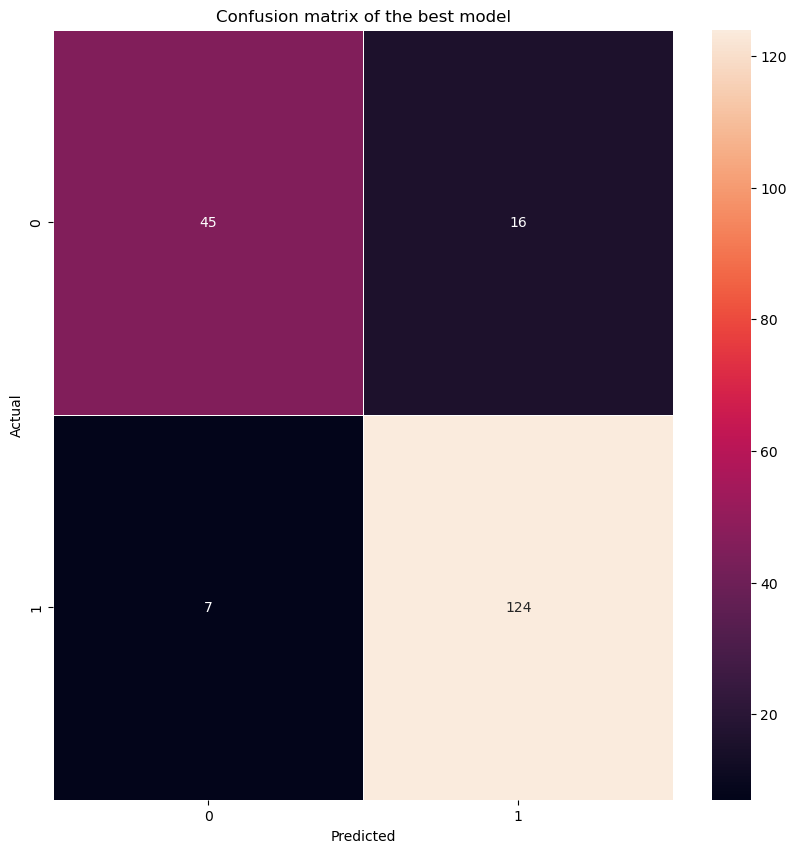

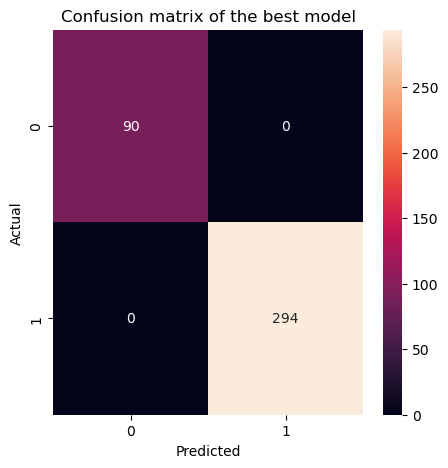

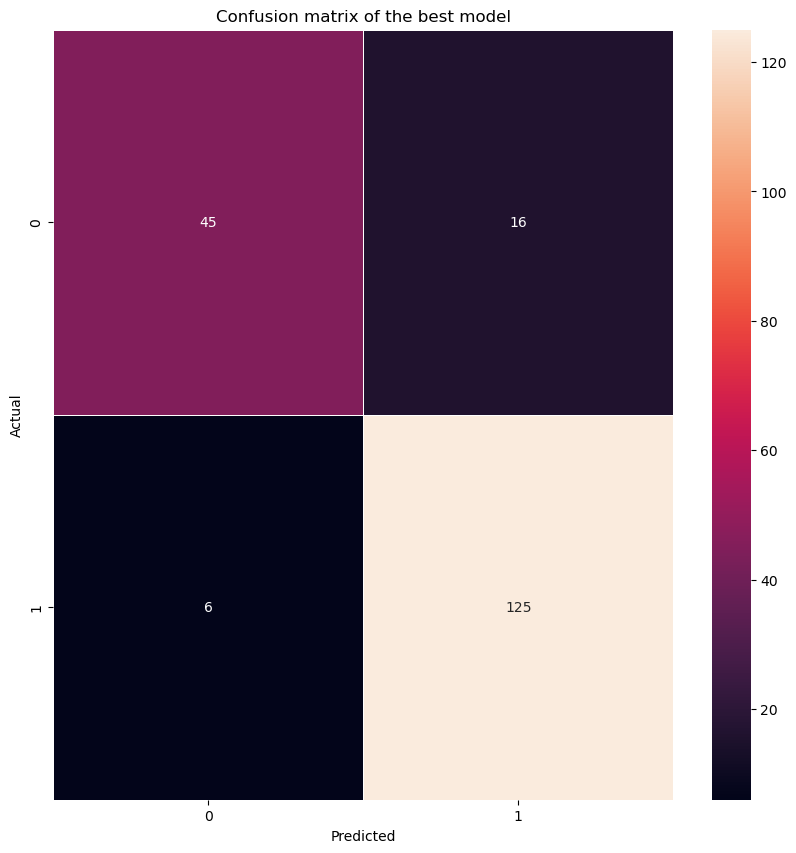

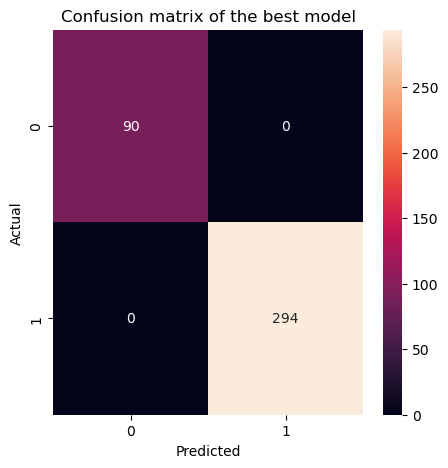

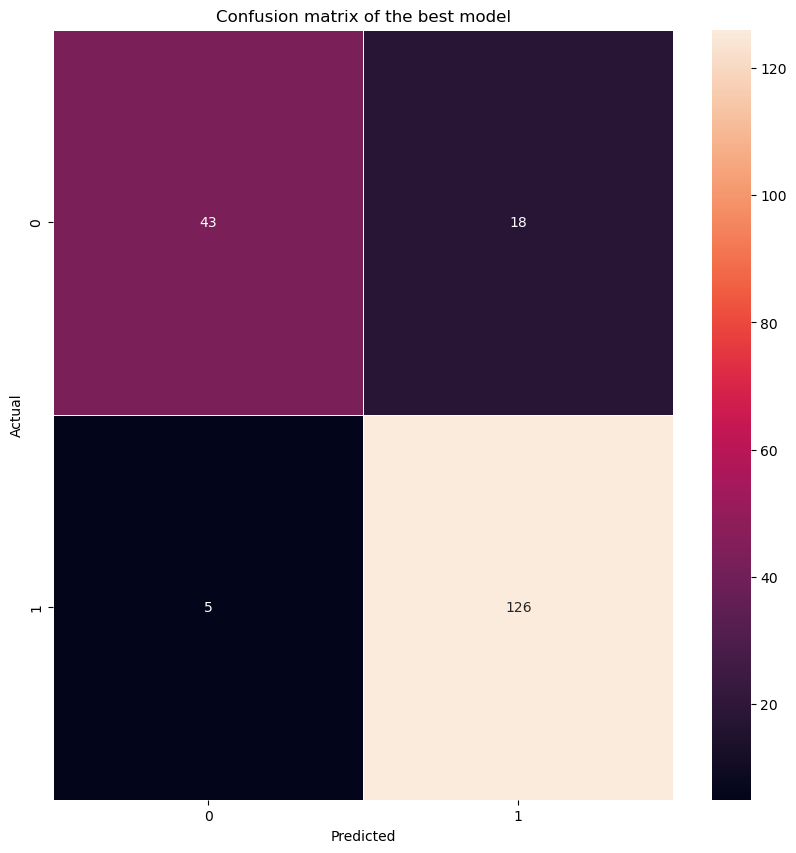

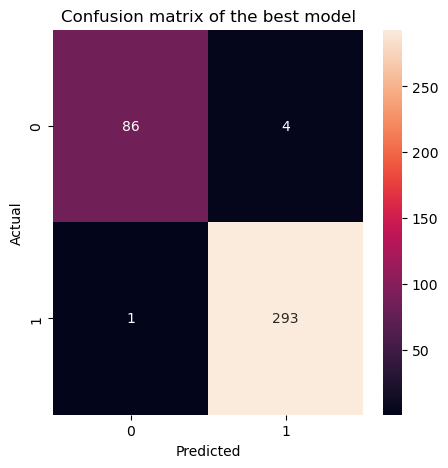

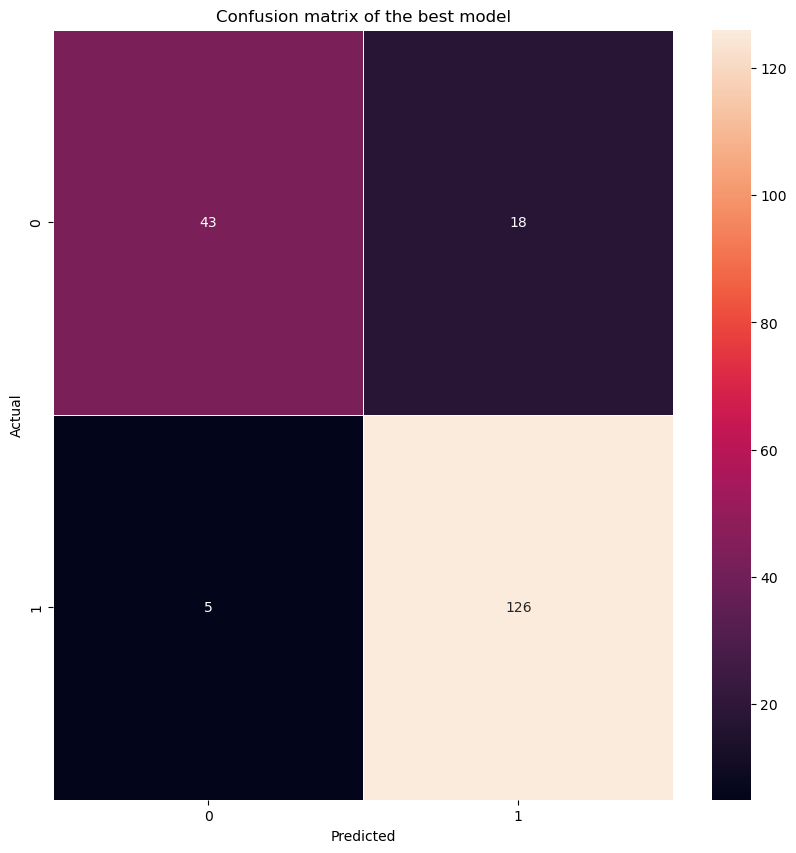

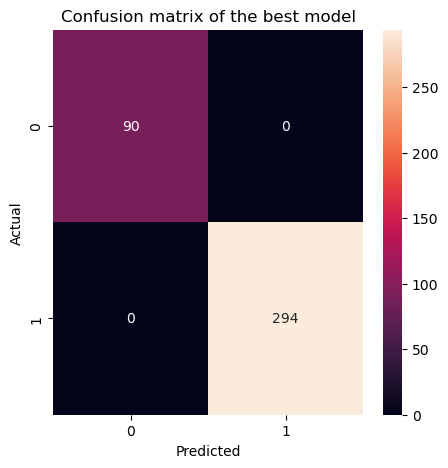

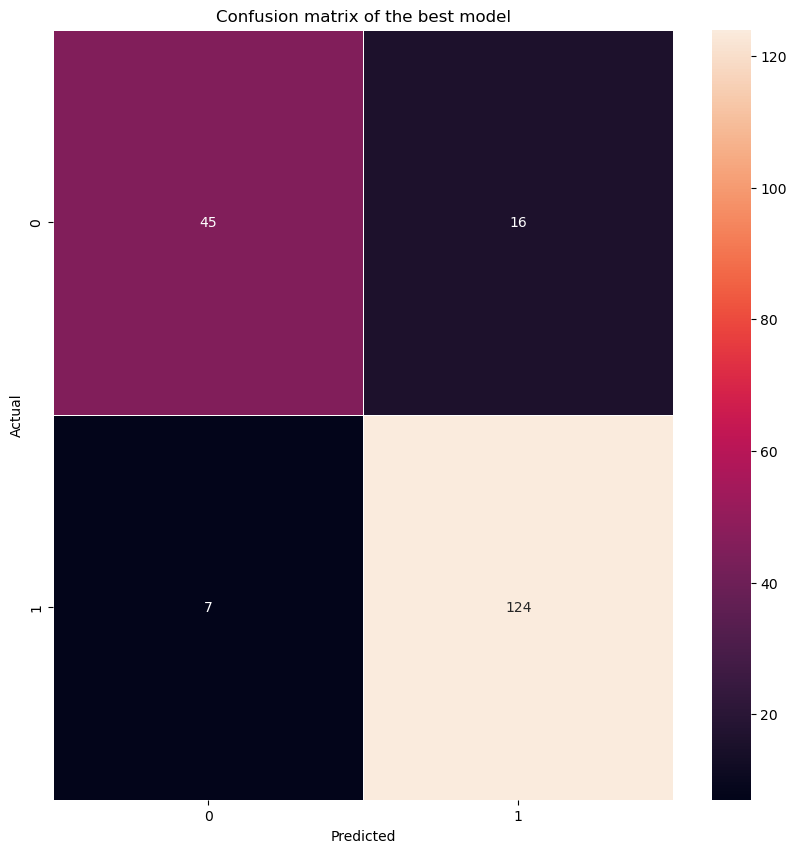

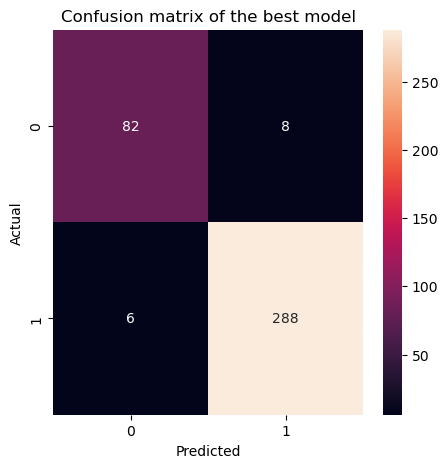

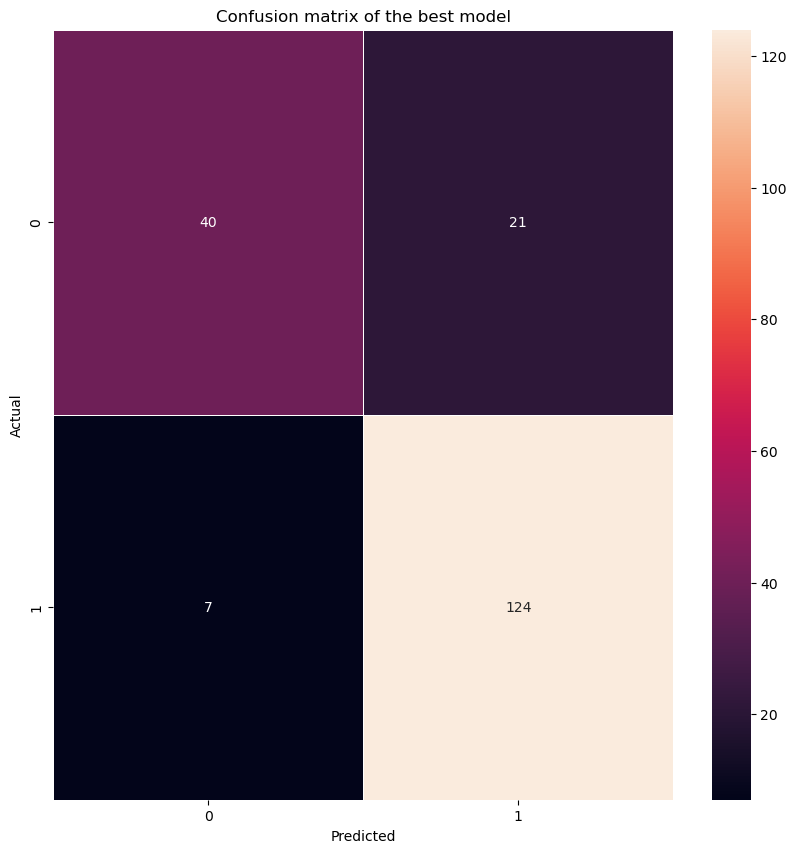

In [2]:
from obelix_ml_pipeline.representation_variables import AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES
# try classifier with loaded representations
selected_ligand_representations = ['dft_nbd_model']
target = 'Conversion'
target_threshold = 0.8
rf_model = RandomForestClassifier(random_state=42)
scoring = 'balanced_accuracy'
train_splits = 5
n_jobs = 4
binary = True
plot_dendrograms = False
substrate_names_column = 'Substrate'
ligand_numbers_column = 'Ligand#'
list_of_training_substrates = ['SM1', 'SM2']
list_of_test_substrates = ['SM3']
print_ml_results = False
print('Training and testing classifier')
print(f'Test size in training (based on K-fold): {1/train_splits}')
list_of_substrate_representations = AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES

# loop over all substrate representations
# collect mean and std of test performance during training per representation for plotting
list_of_test_scores_mean = []
list_of_test_scores_std = []
test_performance = []
for substrate_representation in list_of_substrate_representations:
    selected_substrate_representations = [substrate_representation]
    print(f'Testing substrate representation: {substrate_representation}')
    # do the same with general function predict_out_of_sample_substrate
    best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test = predict_out_of_sample_substrate(selected_ligand_representations, selected_substrate_representations, ligand_numbers_column, substrate_names_column, target, target_threshold, train_splits, binary=binary, list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates, rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs, plot_dendrograms=plot_dendrograms)
    list_of_test_scores_mean.append(training_test_scores_mean)
    list_of_test_scores_std.append(training_test_scores_std)
    test_performance.append(testing_balanced_accuracy_test)
    print('Mean test performance during training: {:.2f} +/- {:.2f}'.format(training_test_scores_mean, training_test_scores_std))
    # print(f'Confusion matrix: {testing_cm_test}')
    print(f'Balanced accuracy on test substrate: {testing_balanced_accuracy_test}')
    # print(f'Feature importance: {fig_fi}')
    # print(f'Confusion matrix: {fig_cm}')
    print('----------------------------------------')

<ErrorbarContainer object of 3 artists>

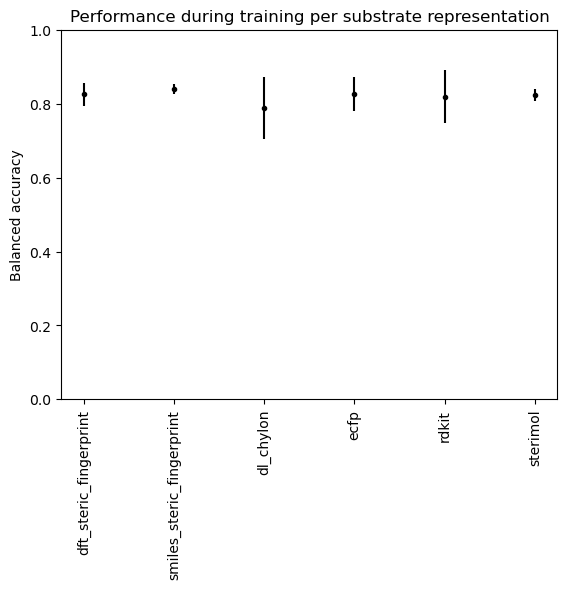

In [3]:
# plot test performance during training
fig, ax = plt.subplots()
ax.set_title('Performance during training per substrate representation')
ax.set_xticks(range(len(list_of_substrate_representations)))
ax.set_xticklabels(list_of_substrate_representations, rotation=90)
# set y range between 0 and 1
ax.set_ylim([0, 1])
ax.set_ylabel('Balanced accuracy')
plt.errorbar(range(len(list_of_substrate_representations)), list_of_test_scores_mean, yerr=list_of_test_scores_std, fmt='.k')

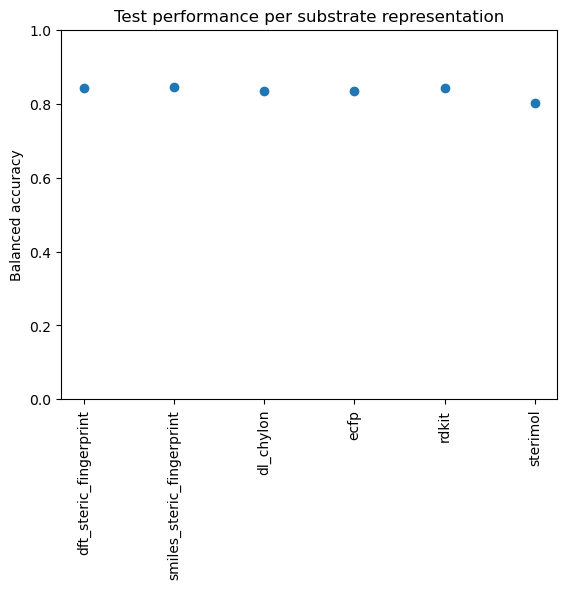

In [4]:
# plot the same for test performance
fig, ax = plt.subplots()
ax.set_title('Test performance per substrate representation')
ax.set_xticks(range(len(list_of_substrate_representations)))
ax.set_xticklabels(list_of_substrate_representations, rotation=90)
# set y range between 0 and 1
ax.set_ylim([0, 1])
ax.set_ylabel('Balanced accuracy')
plt.scatter(range(len(list_of_substrate_representations)), test_performance)

### Test effect of different substrate representations on regression

Training and testing regression
Test size: 0.2
Testing substrate representation: dft_steric_fingerprint
Mean test performance during training: 0.40 +/- 0.07
Balanced accuracy on test substrate: 0.4818588385897876
----------------------------------------
Testing substrate representation: smiles_steric_fingerprint
Mean test performance during training: 0.40 +/- 0.07
Balanced accuracy on test substrate: 0.4818588385897876
----------------------------------------
Testing substrate representation: dl_chylon
Mean test performance during training: 0.40 +/- 0.07
Balanced accuracy on test substrate: 0.4818588385897876
----------------------------------------
Testing substrate representation: ecfp
Mean test performance during training: 0.40 +/- 0.07
Balanced accuracy on test substrate: 0.4818588385897876
----------------------------------------
Testing substrate representation: rdkit
Mean test performance during training: 0.40 +/- 0.07
Balanced accuracy on test substrate: 0.4818588385897876
----

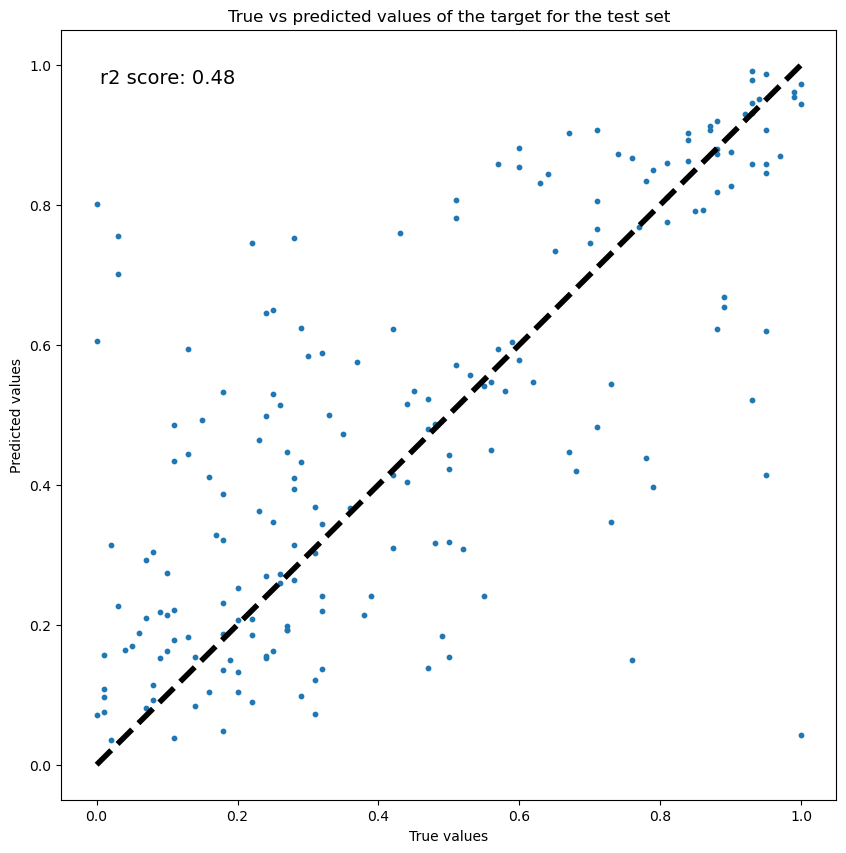

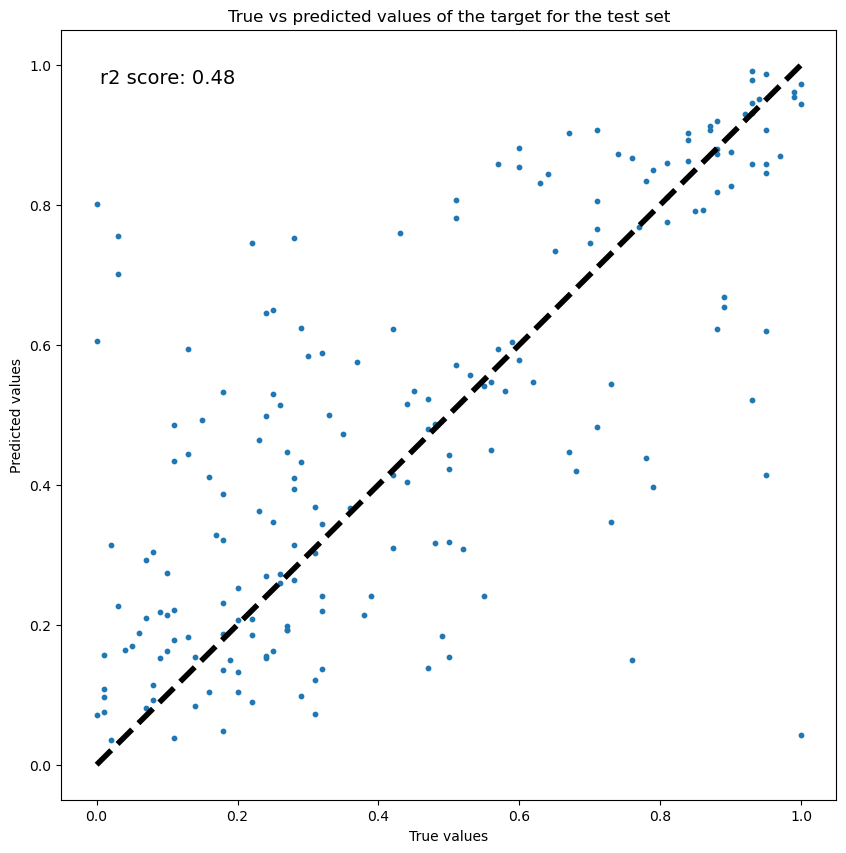

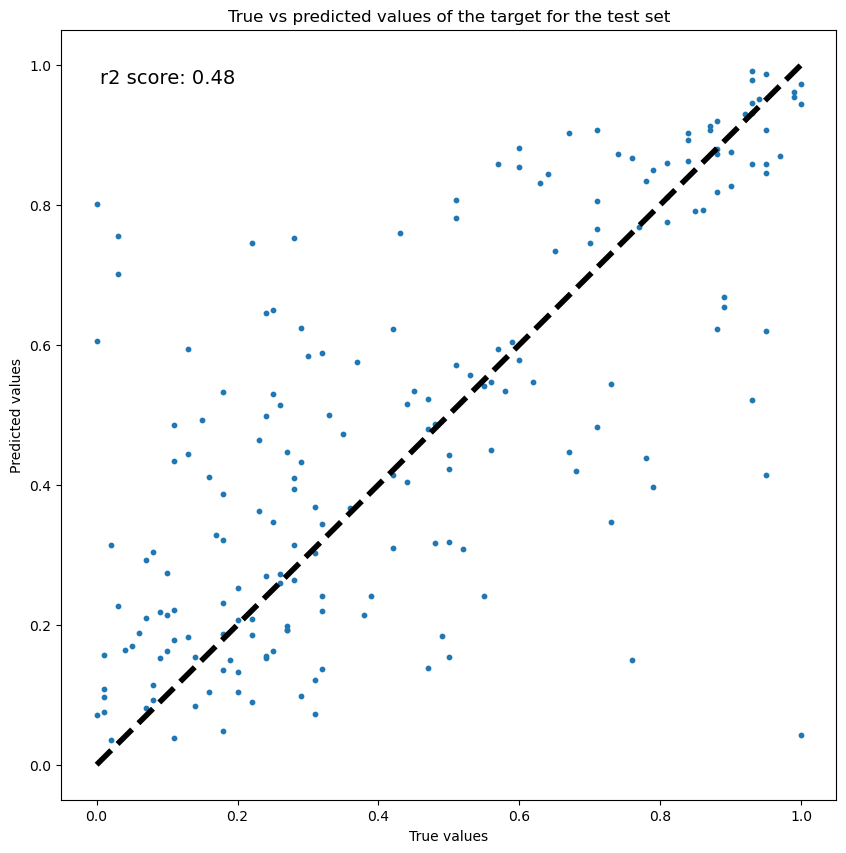

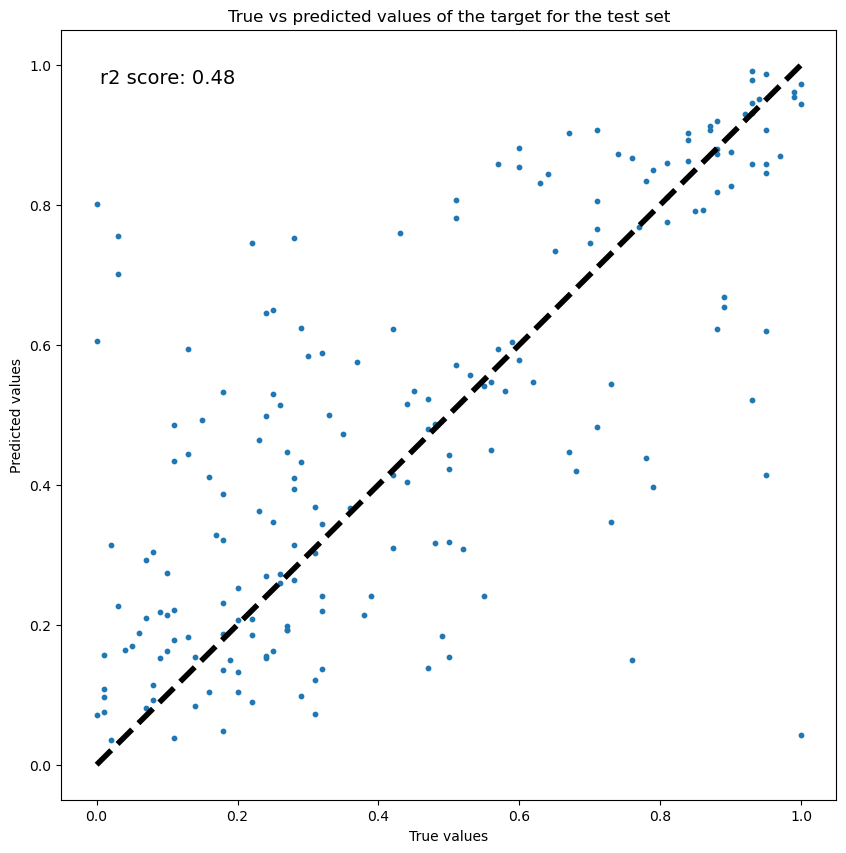

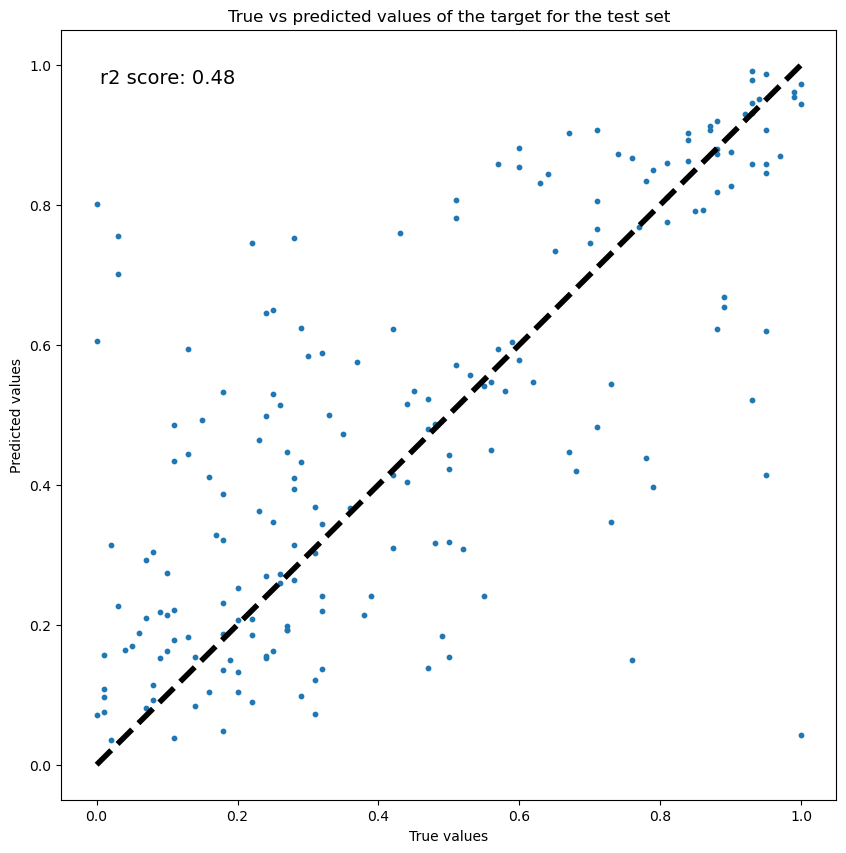

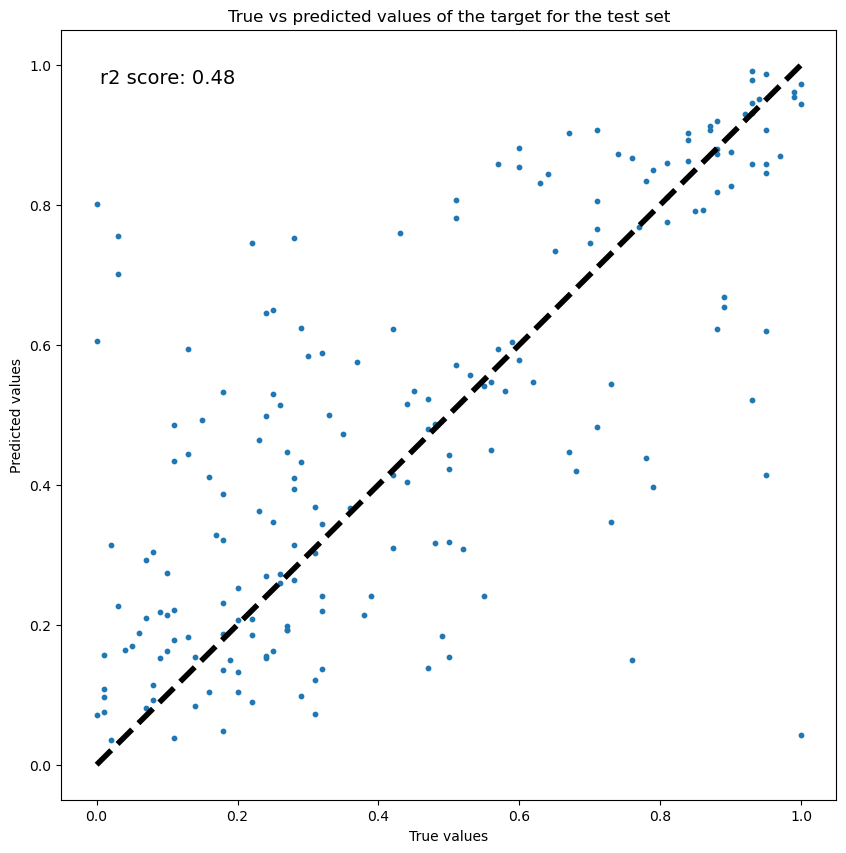

In [5]:
# try regression with loaded representations
selected_ligand_representations = ['dft_nbd_model']
target = 'EE'
target_threshold = 0.6
rf_model = RandomForestRegressor(random_state=42)
scoring = 'r2'
train_splits = 5
n_jobs = 4
binary = False
plot_dendrograms = False
substrate_names_column = 'Substrate'
ligand_numbers_column = 'Ligand#'
list_of_training_substrates = ['SM1', 'SM2']
list_of_test_substrates = ['SM3']
print_ml_results = False

print('Training and testing regression')
print(f'Test size: {1/train_splits}')
list_of_substrate_representations = AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES

# loop over all substrate representations
# collect mean and std of test performance during training per representation for plotting
list_of_test_scores_mean = []
list_of_test_scores_std = []
test_performance = []

for substrate_representation in list_of_substrate_representations:
    print(f'Testing substrate representation: {substrate_representation}')
    best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test = predict_out_of_sample_substrate(
        selected_ligand_representations, selected_substrate_representations, ligand_numbers_column,
        substrate_names_column, target, target_threshold, train_splits, binary=binary,
        list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates,
        rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs, plot_dendrograms=plot_dendrograms)
    list_of_test_scores_mean.append(training_test_scores_mean)
    list_of_test_scores_std.append(training_test_scores_std)
    test_performance.append(testing_balanced_accuracy_test)
    print('Mean test performance during training: {:.2f} +/- {:.2f}'.format(training_test_scores_mean, training_test_scores_std))
    # print(f'Confusion matrix: {testing_cm_test}')
    print(f'Balanced accuracy on test substrate: {testing_balanced_accuracy_test}')
    # print(f'Feature importance: {fig_fi}')
    # print(f'Confusion matrix: {fig_cm}')
    print('----------------------------------------')

<ErrorbarContainer object of 3 artists>

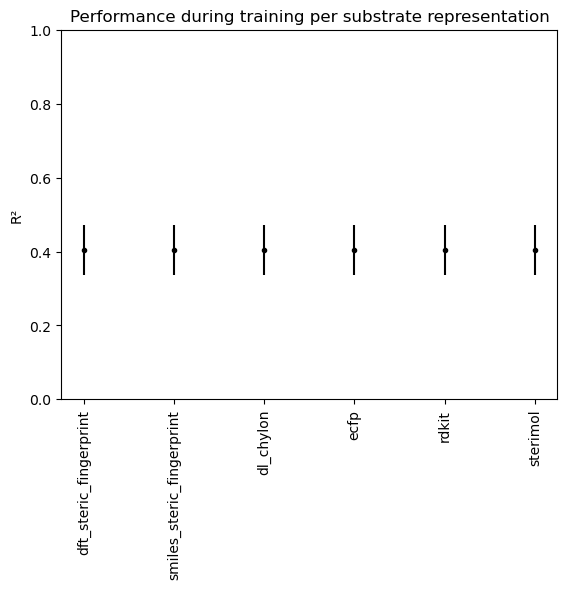

In [8]:
# plot test performance during training
fig, ax = plt.subplots()
ax.set_title('Performance during training per substrate representation')
ax.set_xticks(range(len(list_of_substrate_representations)))
ax.set_xticklabels(list_of_substrate_representations, rotation=90)
# set y range between 0 and 1
ax.set_ylim([0, 1])
# now the R^2 score is used, so the y axis should be R^2
ax.set_ylabel('R\u00B2')
plt.errorbar(range(len(list_of_substrate_representations)), list_of_test_scores_mean, yerr=list_of_test_scores_std, fmt='.k')

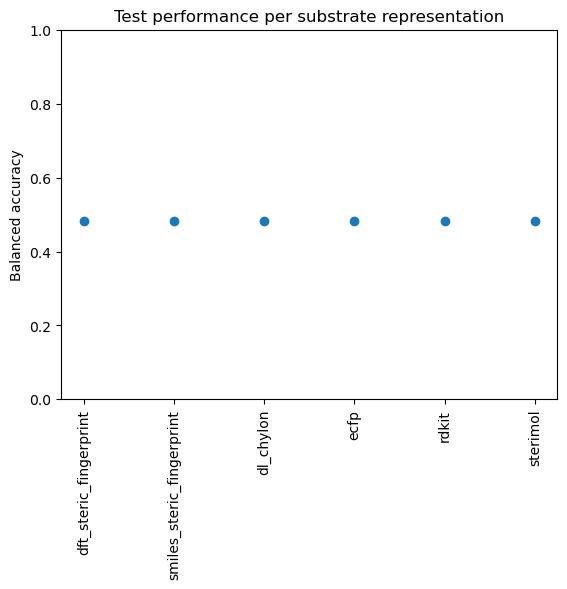

In [35]:
# plot the same for test performance
fig, ax = plt.subplots()
ax.set_title('Test performance per substrate representation')
ax.set_xticks(range(len(list_of_substrate_representations)))
ax.set_xticklabels(list_of_substrate_representations, rotation=90)
# set y range between 0 and 1
ax.set_ylim([0, 1])
ax.set_ylabel('R\u00B2')
plt.scatter(range(len(list_of_substrate_representations)), test_performance)

## Test effect of different combinations of training and test substrates

Training substrates: ['SM2', 'SM3']
Test substrates: ['SM1']
Training and testing classification
Test size: 0.2
Testing substrate representation: ['dft_steric_fingerprint']
Mean test performance during training: 0.76 +/- 0.05
Balanced accuracy on test substrate: 0.8791208791208791
----------------------------------------
Training substrates: ['SM1', 'SM3']
Test substrates: ['SM2']
Training and testing classification
Test size: 0.2
Testing substrate representation: ['dft_steric_fingerprint']
Mean test performance during training: 0.84 +/- 0.02
Balanced accuracy on test substrate: 0.8660287081339713
----------------------------------------
Training substrates: ['SM1', 'SM2']
Test substrates: ['SM3']
Training and testing classification
Test size: 0.2
Testing substrate representation: ['dft_steric_fingerprint']
Mean test performance during training: 0.83 +/- 0.03
Balanced accuracy on test substrate: 0.842134901764485
----------------------------------------


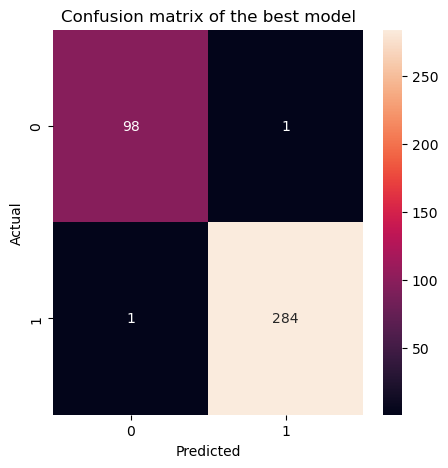

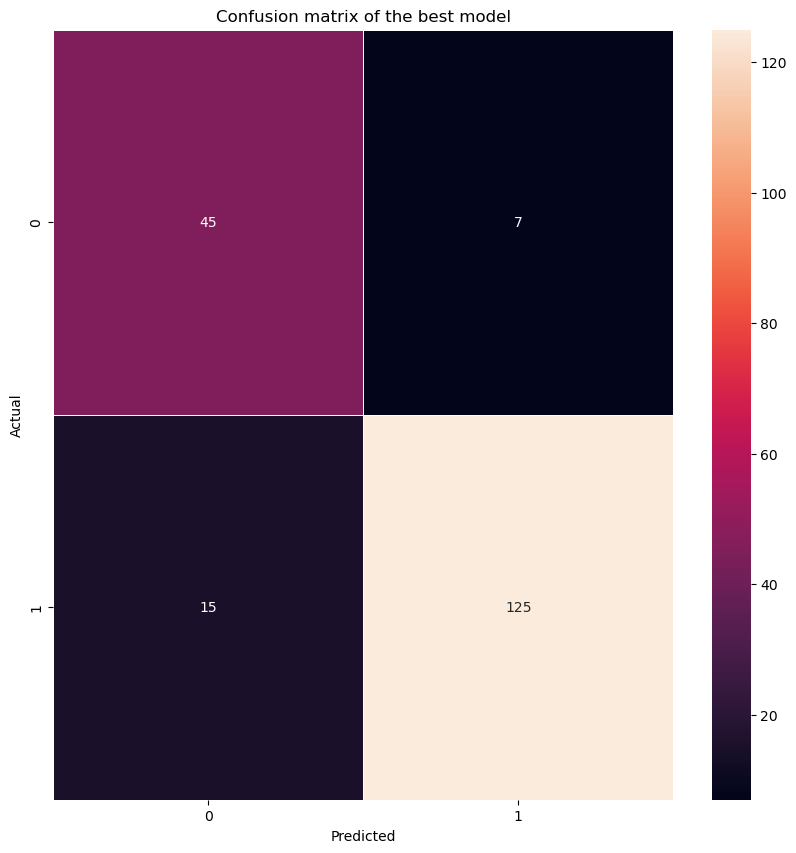

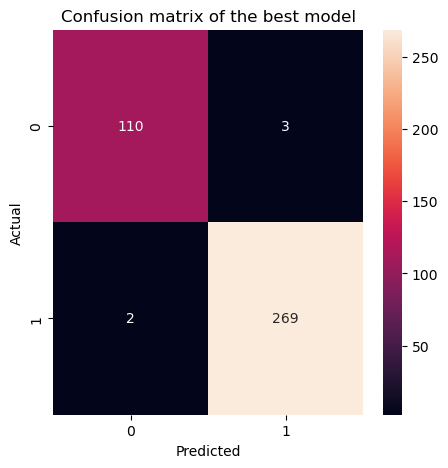

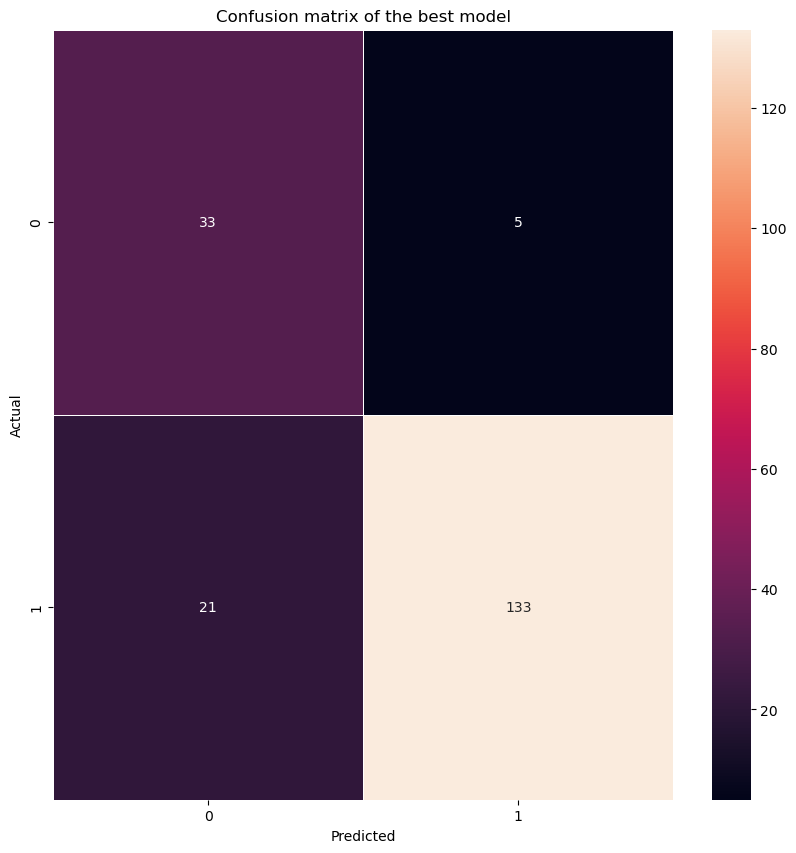

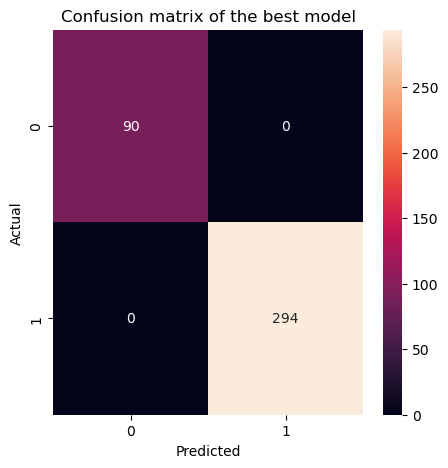

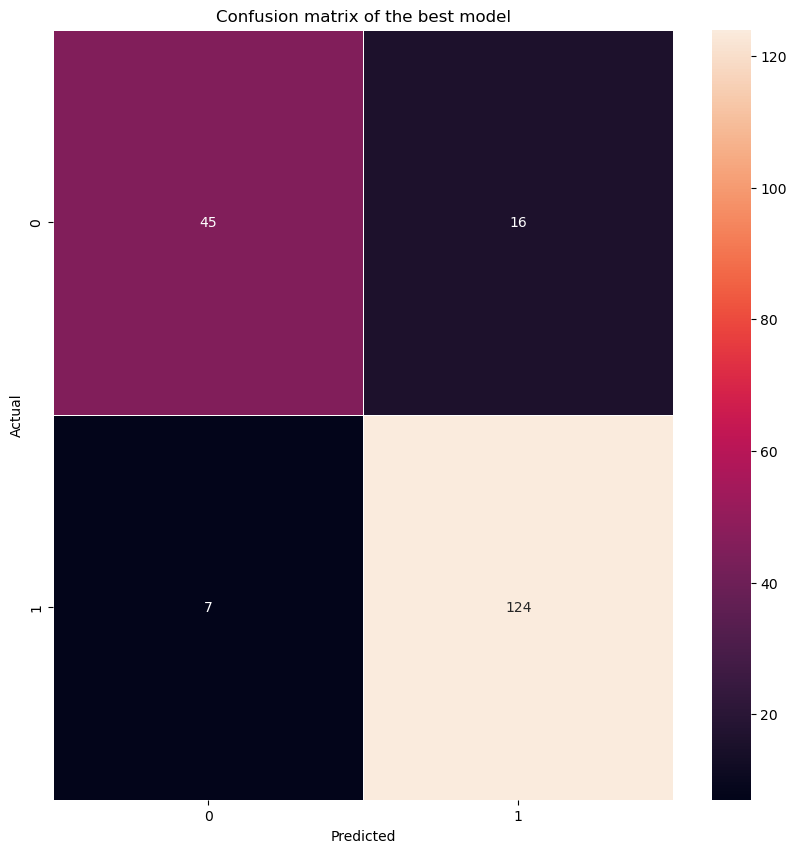

In [42]:
# choose 2 training substrates and 1 test substrate and try regression with loaded representations
list_of_substrates = ['SM1', 'SM2', 'SM3']
list_of_training_substrates = []
list_of_test_substrates = []

for test_substrate in list_of_substrates:
    list_of_training_substrates = [x for x in list_of_substrates if x != test_substrate]
    list_of_test_substrates = [test_substrate]
    print(f'Training substrates: {list_of_training_substrates}')
    print(f'Test substrates: {list_of_test_substrates}')
    selected_ligand_representations = ['dft_nbd_model']
    selected_substrate_representations = ['dft_steric_fingerprint']
    target = 'Conversion'
    target_threshold = 0.8
    rf_model = RandomForestClassifier(random_state=42)
    scoring = 'balanced_accuracy'
    train_splits = 5
    n_jobs = 4
    binary = True
    plot_dendrograms = False
    substrate_names_column = 'Substrate'
    ligand_numbers_column = 'Ligand#'
    print_ml_results = False

    print('Training and testing classification')
    print(f'Test size: {1/train_splits}')

    print(f'Testing substrate representation: {selected_substrate_representations}')
    best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test = predict_out_of_sample_substrate(
        selected_ligand_representations, selected_substrate_representations, ligand_numbers_column,
        substrate_names_column, target, target_threshold, train_splits, binary=binary,
        list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates,
        rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs, plot_dendrograms=plot_dendrograms)
    print('Mean test performance during training: {:.2f} +/- {:.2f}'.format(training_test_scores_mean, training_test_scores_std))
    # print(f'Confusion matrix: {testing_cm_test}')
    print(f'Balanced accuracy on test substrate: {testing_balanced_accuracy_test}')
    # print(f'Feature importance: {fig_fi}')
    # print(f'Confusion matrix: {fig_cm}')
    print('----------------------------------------')
